## Stable Diffusion

* Start a PyTorch notebook instance in Google Cloud Vertex AI Workbench
* Give it 4 CPUs and 1 Nvidia T4 GPU. (costs 70c/hr)
* Wait for it to start, click "Open JupyterLab"
* Git clone this repo, and run the cells in this notebook
* Change the prompt as necessary to create the images you want
* Stop the instance so that you are no longer getting charged for the GPU (only storage, a few cents/month). Delete the instance if you don't want to get charged for storage either.

In [1]:
!pip install --upgrade --quiet diffusers transformers scipy

Restart the kernel after doing the pip install above

## Get Huggingface token
* Visit https://huggingface.co/ and register for an account. You'll need it to get the weights.
* Accept the license terms for https://huggingface.co/CompVis/stable-diffusion-v1-4
* Go to https://huggingface.co/settings/profile and create a new access token for READ.  I called it stablediffusion
* Save the token to a file named token.txt in the same folder as this notebook (DO NOT CHECK THIS FILE INTO GITHUB)

In [1]:
!ls -l token.txt

-rw-r--r-- 1 jupyter jupyter 37 Aug 24 22:42 token.txt


In [2]:
with open('token.txt') as ifp:
    access_token = ifp.readline()
    print('Read a token of length {}'.format( len(access_token) ))

Read a token of length 37


## Run Stable Diffusion

In [8]:
def load_pipeline(access_token):
    import torch
    from diffusers import StableDiffusionPipeline

    model_id = "CompVis/stable-diffusion-v1-4"
    device = "cuda"

    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=access_token)
    pipe = pipe.to(device)
    return pipe


def generate_image(pipe, prompt):
    from torch import autocast
    with autocast("cuda"):
        image = pipe(prompt.lower(), guidance_scale=7.5)["sample"][0]  

    outfilename = prompt.replace(' ', '_') + '.png'
    image.save(outfilename)
    return outfilename

In [4]:
pipeline = load_pipeline(access_token)

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


0it [00:00, ?it/s]

Bald_guy_being_easily_impressed_by_a_robot.png


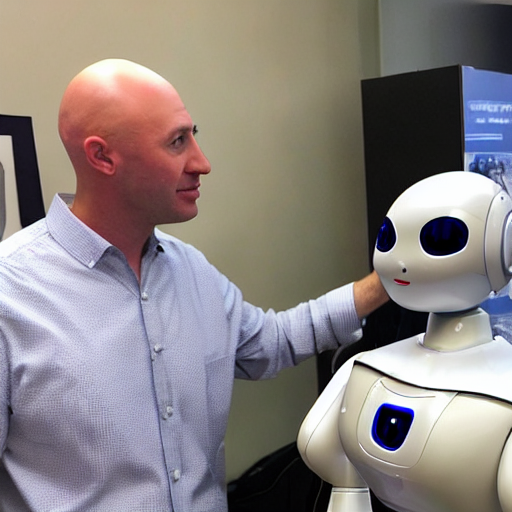

In [12]:
from IPython.display import Image

outfilename = generate_image(pipeline, prompt="Bald guy being easily impressed by a robot")
print(outfilename)
Image(filename=outfilename) 